In [3]:
import cv2
import numpy as np 
from skimage import filters
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.metrics import mean_squared_error
from skimage.metrics import structural_similarity as ssim

## Numpy

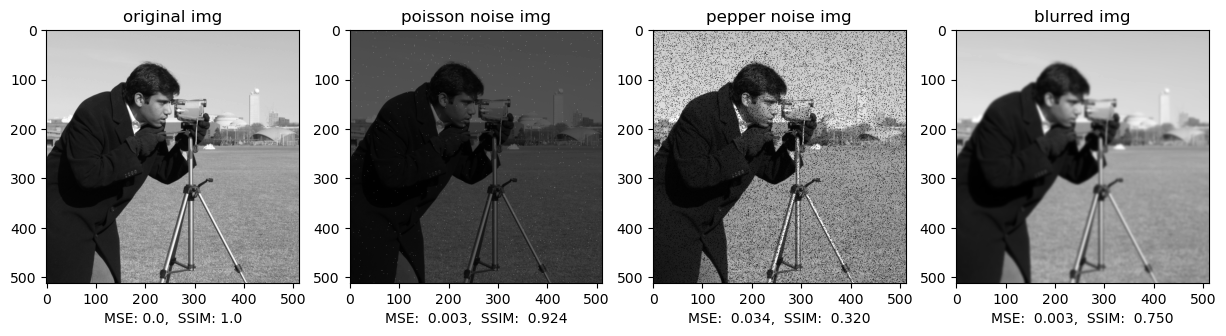

In [37]:
# Images
img = img_as_float(data.camera())

noise1 = np.random.rand(512, 512) * 0.005
poisson_noise = np.random.poisson(noise1)
poisson_noise_img = img + poisson_noise

noise2 = np.random.rand(512, 512)
pepper_noise = noise2 < 0.9 * 1
pepper_noise_img = img * pepper_noise

blurred_img = filters.gaussian(img, sigma=2)


# Metric - MSE, SSIM
mse_none = mean_squared_error(img, img)
ssim_none = ssim(img, img, data_range=img.max() - img.min())

mse_poisson = mean_squared_error(img, poisson_noise_img)
ssim_poisson = ssim(img, poisson_noise_img, data_range=poisson_noise_img.max() - poisson_noise_img.min())

mse_pepper = mean_squared_error(img, pepper_noise_img)
ssim_pepper = ssim(img, pepper_noise_img, data_range=pepper_noise_img.max() - pepper_noise_img.min())

mse_blur = mean_squared_error(img, blurred_img)
ssim_blur = ssim(img, blurred_img, data_range=blurred_img.max() - blurred_img.min())


plt.figure(figsize=(15,10))
plt.subplot(141)
plt.imshow(img, cmap='gray')
plt.xlabel(f"MSE: {mse_none},  SSIM: {ssim_none}")
plt.title("original img")

plt.subplot(142)
plt.imshow(poisson_noise_img, cmap='gray')
plt.title("poisson noise img")
plt.xlabel(f"MSE: {mse_poisson : .3f},  SSIM: {ssim_poisson : .3f}")

plt.subplot(143)
plt.imshow(pepper_noise_img, cmap='gray')
plt.title("pepper noise img")
plt.xlabel(f"MSE: {mse_pepper : .3f},  SSIM: {ssim_pepper : .3f}")

plt.subplot(144)
plt.imshow(blurred_img, cmap='gray')
plt.title("blurred img")
plt.xlabel(f"MSE: {mse_blur : .3f},  SSIM: {ssim_blur : .3f}")

plt.show()

## Pytorch
loss
- https://github.com/Po-Hsun-Su/pytorch-ssim

In [4]:
import cv2
import torch
import numpy as np 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from skimage import data, img_as_float

2023-05-19 02:12:44.342283: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [169]:
print(img.max(), img.min())
print(poisson_noise.max(), poisson_noise.min())
print(poisson_noise_img.max(), poisson_noise_img.min())

print(pepper_noise_img.max(), pepper_noise_img.min())

1.0 0.0
1 0
2.0 0.0
1.0 0.0


In [38]:
def mse(img1, img2):
    return torch.mean((img1 - img2)**2)

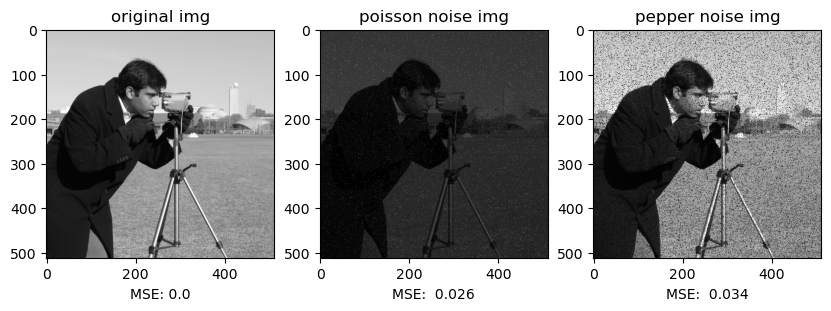

In [39]:
# Images
img = torch.tensor(data.camera())/255.

noise1 = torch.rand(512, 512) * 0.05
poisson_noise = torch.poisson(noise1)
poisson_noise_img = img + poisson_noise

noise2 = torch.rand(512, 512)
pepper_noise = noise2 < 0.9 * 1
pepper_noise_img = img * pepper_noise


# Metric - MSE, SSIM
mse_none = mse(img, img)
# ssim_none = ssim(img, img, data_range=img.max() - img.min())

mse_poisson = mse(img, poisson_noise_img)
# ssim_poisson = ssim(img, poisson_noise_img, data_range=poisson_noise_img.max() - poisson_noise_img.min())

mse_pepper = mse(img, pepper_noise_img)
# ssim_pepper = ssim(img, pepper_noise_img, data_range=pepper_noise_img.max() - pepper_noise_img.min())


plt.figure(figsize=(10,10))
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.xlabel(f"MSE: {mse_none}")
# plt.xlabel(f"MSE: {mse_none},  SSIM: {ssim_none}")
plt.title("original img")

plt.subplot(132)
plt.imshow(poisson_noise_img, cmap='gray')
plt.xlabel(f"MSE: {mse_poisson : .3f}")
plt.title("poisson noise img")

plt.subplot(133)
plt.imshow(pepper_noise_img, cmap='gray')
plt.xlabel(f"MSE: {mse_pepper : .3f}")
plt.title("pepper noise img")

plt.show()

In [20]:
# def mean(img):
#     return torch.mean(img)

# def sigma(img):
#     return torch.std(img)

# def cov(img1, img2):
#     x = torch.tensor(img1.shape, dtype=torch.float64)
#     y = torch.tensor(img2.shape, dtype=torch.float64)
#     return torch.mean(x * y) - mean(x) * mean(y)

# def SSIM(img1, img2, L=256, K1=0.01, K2=0.03):
#     C1 = K1 * K1 * L * L
#     C2 = K2 * K2 * L * L
#     C3 = C2 / 2
    
#     I = (2 * mean(img1) * mean(img2) + C1) / (mean(img1)**2 + mean(img2)**2 + C1)
#     C = (2 * sigma(img1) * sigma(img2) + C2) / (sigma(img1)**2 + sigma(img2)**2 + C2)
#     S = (cov(img1, img2) + C3) / (sigma(img1) * sigma(img2) + C3)
    
#     return I * C * S

In [40]:
def mean(img):
    return torch.mean(img)

def sigma(img):
    return torch.std(img)

def cov(img1, img2):
    return mean(img1*img2) - mean(img1)*mean(img2)

def SSIM(x, y, K1=0.01, K2=0.03, L=1.):
    c1 = (K1*L)**2
    c2 = (K2*L)**2
    c3 = c2 / 2
    
    I = (2 * mean(x) * mean(y) + c1) / (mean(x)**2 + mean(y)**2 + c1)
    c = (2 * sigma(x) * sigma(y) + c2) / (sigma(x)**2 + sigma(y)**2 + c2)
    s = (cov(x,y) + c2) / (sigma(x) * sigma(y) + c3)
    
    return I * c * s

In [41]:
SSIM(img, img), SSIM(img, poisson_noise_img), SSIM(img, pepper_noise_img)

(tensor(1.0054), tensor(0.8737), tensor(0.8282))


Q. 이미지의 값을 0~1로 normalize했을 때랑 0~255일 때랑 MSE와 SSIM 값의 차이가 너무 크다. ???